## 1.随机采样

所谓采样，实际上是指根据某种分布去生成一些数据点。也就是说，这是我们根据观察数据再确定分布的过程的逆过程。

最基本的假设是认为我们可以获得均匀分布的随机数。一般的采样问题，都可以理解成，有了均匀分布的采样，如何去获取复杂分布的采样

对于连续的分布，如果可以计算这个分布的累积分布函数（CDF），就可以通过计算CDF的反函数，结合基础的均匀分布，获得其采样。所以，在这个基础上我们又可以获得一些简单的分布的采样。接下来，我们专注于复杂的任意分布的采样。

## 2.拒绝采样（Rejection Sampling）

假设我们已经可以抽样高斯分布q(x)（如Box–Muller_transform 算法），我们按照一定的方法**拒绝**某些样本，达到接近p(x)分布的目的:
![reject](http://images.cnitblog.com/blog/533521/201310/25225434-fd6db018b45d4152a09ea1de2b5304ad.png)
具体操作：
- 首先，确定常量k，使得p(x)总在kq(x)的下方。
- x轴方向：从q(x)分布抽样得到a。但是a并不一定留下，会有一定的几率被**拒绝**
- y轴方向：从均匀分布(0,kq(a))中抽样得到u。如果u>p(a)，也就是落到了灰色的区域中，拒绝，否则接受这次抽样

reject count:  17662
Time  0.0629198551178


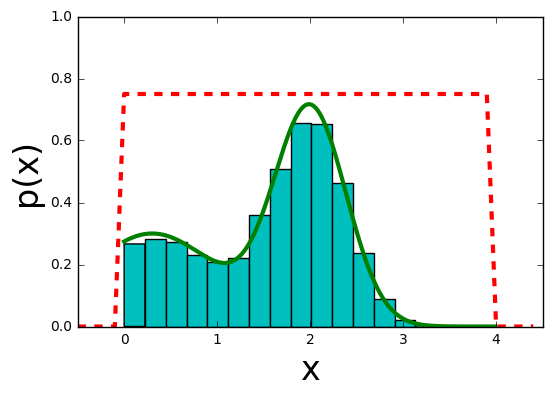

In [8]:
# -*- coding=utf8 -*-

# Code from Chapter 14 of Machine Learning: An Algorithmic Perspective
# The basic rejection sampling algorithm
# 稍有修改，使用matplotlib

%matplotlib inline 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def qsample():
    """使用均匀分布作为q(x)"""
    return np.random.rand()*4.

def p(x):
    """目标分布"""
    return 0.3*np.exp(-(x-0.3)**2) + 0.7* np.exp(-(x-2.)**2/0.3) 

def rejection(nsamples):
    
    M = 0.72#0.8 k值
    samples = np.zeros(nsamples,dtype=float)
    count = 0
    for i in range(nsamples):
        accept = False
        while not accept:
            x = qsample()
            u = np.random.rand()*M
            if u<p(x):
                accept = True
                samples[i] = x
            else: 
                count += 1
    print "reject count: ", count   
    return samples

x = arange(0,4,0.01)
x2 = arange(-0.5,4.5,0.1)
realdata = 0.3*exp(-(x-0.3)**2) + 0.7* exp(-(x-2.)**2/0.3) 
box = ones(len(x2))*0.75#0.8
box[:5] = 0
box[-5:] = 0
plt.plot(x,realdata,'g',lw=3)
plt.plot(x2,box,'r--',lw=3)

import time
t0=time.time()
samples = rejection(10000)
t1=time.time()
print "Time ",t1-t0

plt.hist(samples,15,normed=1,fc='c')
plt.xlabel('x',fontsize=24)
plt.ylabel('p(x)',fontsize=24)
plt.axis([-0.5,4.5,0,1])
plt.show()

在高维的情况下，Rejection Sampling有两个问题：

1. 合适的q分布很难找
2. 很难确定一个合理的k值

导致拒绝率很高。

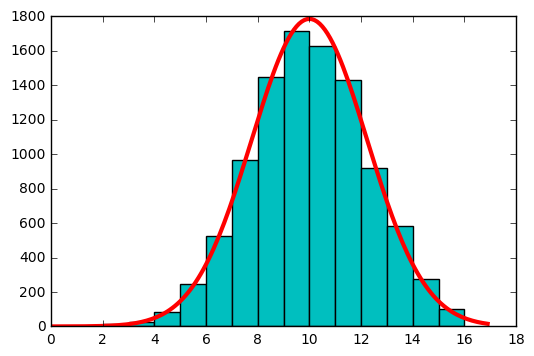

In [11]:
# -*- coding=utf8 -*-

# Code from Chapter 14 of Machine Learning: An Algorithmic Perspective
# A simple Gibbs sampler

from pylab import *
from numpy import *

def pXgivenY(y,m1,m2,s1,s2):
    return random.normal(m1 + (y-m2)/s2,s1)

def pYgivenX(x,m1,m2,s1,s2):
    return random.normal(m2 + (x-m1)/s1,s2)

def gibbs(N=5000):
    k=20
    x0 = zeros(N,dtype=float)
    m1 = 10
    m2 = 20
    s1 = 2
    s2 = 3
    for i in range(N):
        y = random.rand(1)
        # 每次采样需要迭代 k 次
        for j in range(k):
            x = pXgivenY(y,m1,m2,s1,s2)
            y = pYgivenX(x,m1,m2,s1,s2)
        x0[i] = x
    
    return x0

def f(x):
    return exp(-(x-10)**2/10)

# 画图
N=10000
s=gibbs(N)
x1 = arange(0,17,1)
hist(s,bins=x1,fc='c')
x1 = arange(0,17, 0.1)
px1 = zeros(len(x1))
for i in range(len(x1)):
    px1[i] = f(x1[i])
plot(x1, px1*N*10/sum(px1), color='r',linewidth=3)

show()